In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


In [13]:
data=pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [14]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


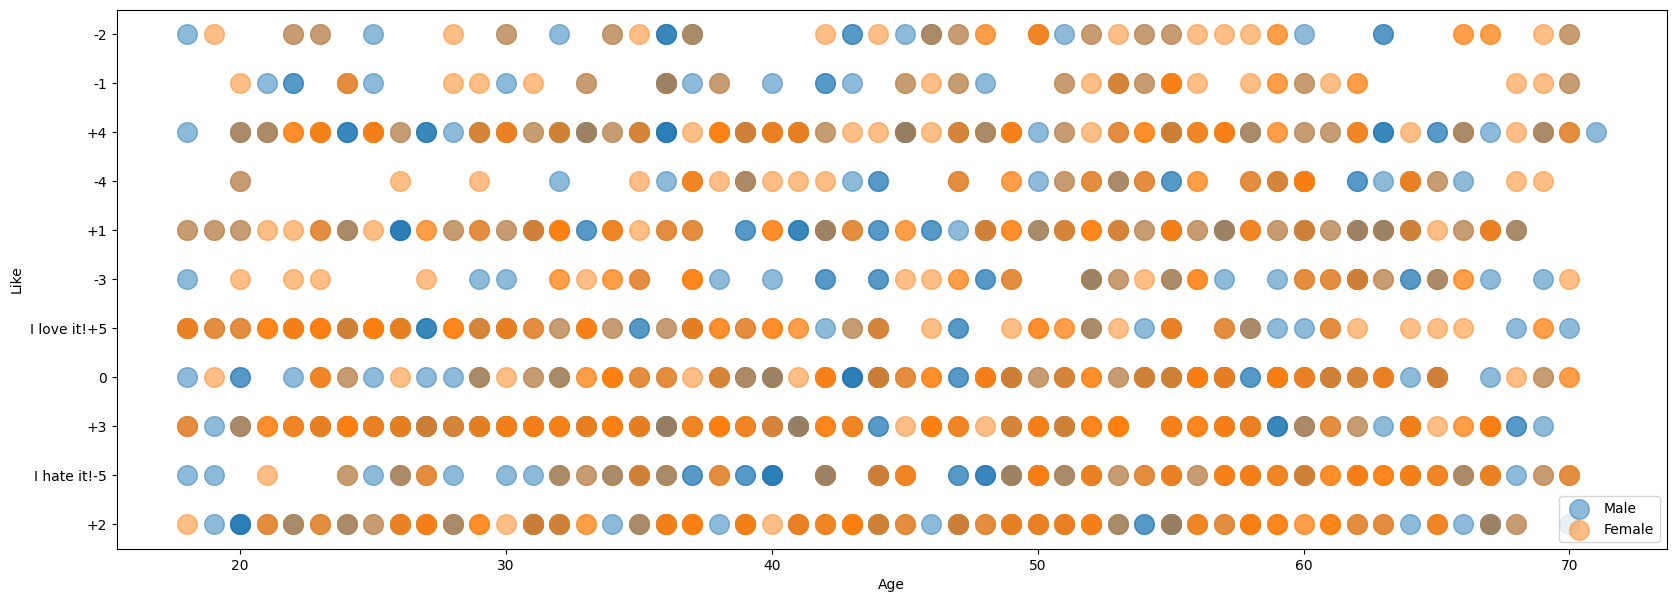

In [19]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Like', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Like")
plt.show()

In [27]:
data_processed = data.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)
data_labelled = data_processed.apply(LabelEncoder().fit_transform)

In [25]:
data_labelled

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [28]:
from sklearn.decomposition import PCA

In [32]:
pca_data = preprocessing.scale(data_labelled)
pca = PCA(n_components=11)
transformed_data = pca.fit_transform(data_labelled)


In [33]:
print(transformed_data)

[[ 0.42536706 -0.21907878  0.6632553  ...  0.18100693  0.51570617
  -0.56707389]
 [-0.21863768  0.38818996 -0.73082668 ...  0.11147641  0.49331285
  -0.50044033]
 [ 0.37541475  0.73043507 -0.12203978 ... -0.32228786  0.06175857
   0.24274108]
 ...
 [-0.18589445  1.06266156  0.22085675 ...  0.03825472  0.05651822
  -0.01279977]
 [-1.18206441 -0.03856977  0.56156066 ...  0.02226748 -0.00257265
  -0.10531631]
 [ 1.55024186  0.27503101 -0.01373727 ... -0.13658866 -0.43279782
  -0.45607556]]


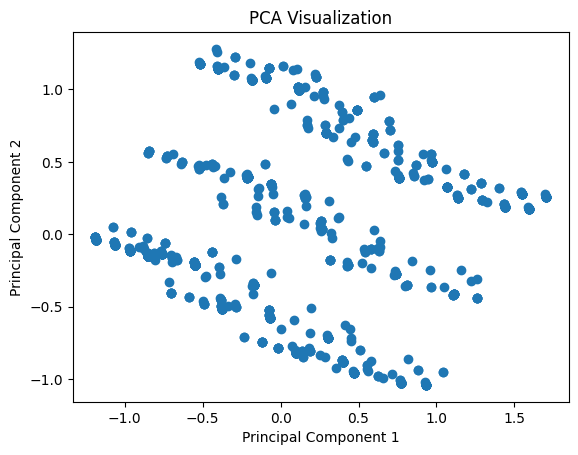

In [35]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

In [38]:
pca_data = pd.DataFrame(data=transformed_data, columns=['1','2','3','4','5','6','7','8','9','10','11'])


covariance_matrix = pca_data.cov()
print(covariance_matrix)


               1             2             3             4             5  \
1   5.731240e-01 -5.015884e-17 -1.575110e-17 -1.835079e-18 -1.284556e-17   
2  -5.015884e-17  3.690023e-01  1.712741e-17  2.324434e-17 -3.891898e-17   
3  -1.575110e-17  1.712741e-17  2.546408e-01  2.683804e-17 -7.409133e-17   
4  -1.835079e-18  2.324434e-17  2.683804e-17  1.590403e-01  1.116340e-17   
5  -1.284556e-17 -3.891898e-17 -7.409133e-17  1.116340e-17  1.138421e-01   
6   3.960713e-17 -2.431480e-17  1.689802e-17  3.670159e-18 -1.875222e-17   
7  -3.578405e-17  2.936127e-17  9.653282e-18  9.328320e-18  4.893545e-18   
8   2.752619e-18  3.976005e-18 -2.940906e-17 -5.658161e-18 -2.874958e-17   
9   2.997296e-17 -6.116931e-19 -2.599696e-18  1.276909e-17  2.859665e-17   
10 -4.893545e-18 -1.529233e-18  1.253971e-17  1.315140e-17 -4.740622e-17   
11 -2.676157e-18 -2.752619e-17 -1.696015e-17 -1.804495e-17 -1.238679e-17   

               6             7             8             9            10  \
1   3.96071

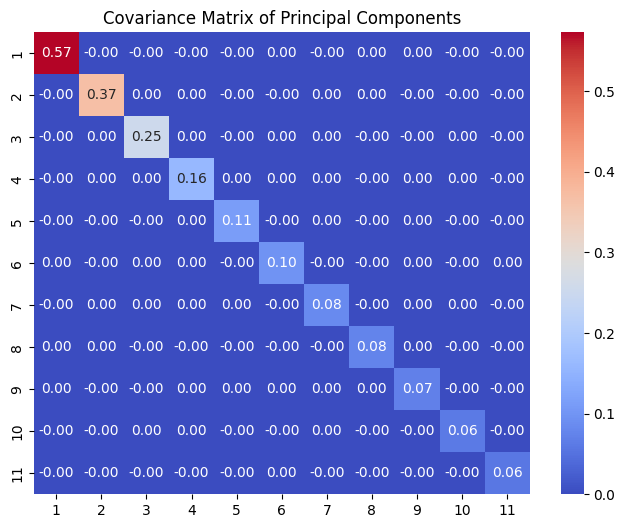

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix of Principal Components')
plt.show()